In [56]:
import pandas as pd

In [57]:
df = pd.read_csv("Input/GSAF5.csv", encoding = "ISO-8859-1")
display(df.head())
print(df.shape)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


(5992, 24)


In [58]:
#First, let's take a look at null values

null_cols = df.isnull().sum()
display(null_cols[null_cols > 0])
print(df.columns)
print("\nAs we can see, the two last columns are completely empty and should be removed.\n")
print("Columns age, time and species are c.50% empty so we will ignore them\n")




Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
href formula                 1
href                         3
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

As we can see, the two last columns are completely empty and should be removed.

Columns age, time and species are c.50% empty so we will ignore them



In [59]:
drop_cols = list(null_cols[null_cols > 3500].index)
df = df.drop(drop_cols, axis=1)

print(df.dtypes)
print("\n1) Date cannot be analyzed because it contains different types of inputs.")
print("2) It seems Case number and href are duplicated, we can drop these columns.\n")

drop_Case = ["Case Number.1", "Case Number.2", "href"]
df = df.drop(drop_Case, axis=1)





Case Number               object
Date                      object
Year                       int64
Type                      object
Country                   object
Area                      object
Location                  object
Activity                  object
Name                      object
Sex                       object
Age                       object
Injury                    object
Fatal (Y/N)               object
Time                      object
Species                   object
Investigator or Source    object
pdf                       object
href formula              object
href                      object
Case Number.1             object
Case Number.2             object
original order             int64
dtype: object

1) Date cannot be analyzed because it contains different types of inputs.
2) It seems Case number and href are duplicated, we can drop these columns.



In [60]:
col_analysis = ["Year", "Country", "Case Number", "Activity", "Injury", "Fatal (Y/N)"]
df = df.loc[:,col_analysis]
display(df.head())

,Year,Country,Case Number,Activity,Injury,Fatal (Y/N)
0,2016,USA,2016.09.18.c,Surfing,Minor injury to thigh,N
1,2016,USA,2016.09.18.b,Surfing,Lacerations to hands,N
2,2016,USA,2016.09.18.a,Surfing,Lacerations to lower leg,N
3,2016,AUSTRALIA,2016.09.17,Surfing,Struck by fin on chest & leg,N
4,2016,AUSTRALIA,2016.09.15,Surfing,No injury: Knocked off board by shark,N


In [61]:
#We will analyze these columns to further clean the data in which we are interested

# 1) Analyzing Year column

print("Showing unique values for Year column\n")
display(df["Year"].unique())

    # Action: we will drop all values for years before 1800 as they don't seem to be reliable

df = df[df["Year"] >= 1800]
    


Showing unique values for Year column



array([2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995,
       1984, 1994, 1993, 1992, 1991, 1990, 1989, 1969, 1988, 1987, 1986,
       1985, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974,
       1973, 1972, 1971, 1970, 1968, 1967, 1966, 1965, 1964, 1963, 1962,
       1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951,
       1950, 1949, 1948, 1848, 1947, 1946, 1945, 1944, 1943, 1942, 1941,
       1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931, 1930,
       1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922, 1921, 1920, 1919,
       1918, 1917, 1916, 1915, 1914, 1913, 1912, 1911, 1910, 1909, 1908,
       1907, 1906, 1905, 1904, 1903, 1902, 1901, 1900, 1899, 1898, 1897,
       1896, 1895, 1894, 1893, 1892, 1891, 1890, 1889, 1888, 1887, 1886,
       1885, 1884, 1883, 1882, 1881, 1880, 1879, 1878, 1877, 1876, 1875,
       1874, 1873, 1872, 1871, 1870, 1869, 1868, 18

In [62]:
 # 2) Analyzing Country column
    
    # Action: we will check cases by country and show only values for the main countries.
    # The rest will be classified as "Other" in a separated dataframe

df_by_country = df.groupby('Country').Country.count().sort_values(ascending = False)
perc_by_country = round((df_by_country / df_by_country.sum() * 100), 1)
df_by_country = pd.DataFrame({"Cases by country": df_by_country, "% Over total": perc_by_country})
df_by_country.reset_index(inplace=True)
df_by_country.loc[df_by_country['Cases by country'] < 25, ['Country']] = 'OTHER'
df_by_country = df_by_country.groupby(['Country'])["% Over total", "Cases by country"].sum()
df_by_country.sort_values(by=["% Over total"], inplace= True, ascending = False)
display(df_by_country)

    # Let's update the original DataFrame with "Other" values in non-significant countries

list1 = df_by_country.index.tolist()
list2 = []

for i in range(len(df.index)):
    if df.loc[i,"Country"] in list1:
        list2.append(df.loc[i,"Country"])
    else:
        list2.append("OTHER")

df["Country"] = list2

display(df)
print(df.Country.unique())


,% Over total,Cases by country
Country,,
USA,36.2,2096
AUSTRALIA,21.7,1260
OTHER,11.5,729
SOUTH AFRICA,9.6,557
PAPUA NEW GUINEA,2.2,129
NEW ZEALAND,2.1,124
BRAZIL,1.8,102
BAHAMAS,1.6,95
MEXICO,1.4,80


,Year,Country,Case Number,Activity,Injury,Fatal (Y/N)
0,2016,USA,2016.09.18.c,Surfing,Minor injury to thigh,N
1,2016,USA,2016.09.18.b,Surfing,Lacerations to hands,N
2,2016,USA,2016.09.18.a,Surfing,Lacerations to lower leg,N
3,2016,AUSTRALIA,2016.09.17,Surfing,Struck by fin on chest & leg,N
4,2016,AUSTRALIA,2016.09.15,Surfing,No injury: Knocked off board by shark,N
5,2016,AUSTRALIA,2016.09.15.R,Fishing,Shark rammed boat. No injury to occupant,N
6,2016,USA,2016.09.11,Wading,Minor injury to arm,N
7,2016,USA,2016.09.07,Swimming,Severe lacerations to shoulder & forearm,N
8,2016,NEW CALEDONIA,2016.09.06,Kite surfing,FATAL,Y
9,2016,USA,2016.09.05.b,Boogie boarding,Lacerations & punctures to lower right leg,N


['USA' 'AUSTRALIA' 'NEW CALEDONIA' 'REUNION' 'BAHAMAS' 'SPAIN' 'OTHER'
 'JAPAN' 'SOUTH AFRICA' 'EGYPT' 'NEW ZEALAND' 'BRAZIL' 'MOZAMBIQUE' 'FIJI'
 'ITALY' 'MEXICO' 'PAPUA NEW GUINEA' 'PHILIPPINES' 'CROATIA'
 'SOLOMON ISLANDS' 'PANAMA' 'CUBA' 'INDIA' 'IRAN']


In [63]:
# 3) Analyzing Activity column

    # First, we will rename fields in the main DataFrame with following criteria:
        # a) If contains swimming, rename to Swimming
        # b) If contains diving, rename to Diving
        # c) If contains surf, rename to Surfing
        # d) If contains fish, rename to Fishing

df.Activity = df.Activity.str.replace("(.+)?[sS]urf(.+)?", "Surfing")
df.Activity = df.Activity.str.replace("(.+)?[sS]wim(.+)?", "Swimming")
df.Activity = df.Activity.str.replace("(.+)?[dD]iv(.+)?", "Diving")
df.Activity = df.Activity.str.replace("(.+)?[fF]ish(.+)?", "Fishing")

    # Then, we will re-classify activities with less than 10 ocurrences as "Other"
df_by_activity = df.groupby("Activity").Activity.count().sort_values(ascending = False)
df_by_activity = pd.DataFrame({"Occurrences by Activity": df_by_activity})
df_by_activity.reset_index(inplace=True)
df_by_activity.loc[df_by_activity['Occurrences by Activity'] < 50, ['Activity']] = 'Other'
df_by_activity = pd.DataFrame(df_by_activity.groupby(['Activity'])["Occurrences by Activity"].sum().sort_values(ascending = False))
display(df_by_activity)

    
    # Many occurrences are under "OTHER" category, which implies discarding many cases in the analysis by activity.
    # Nevertheless, we will analyze the remaining accidents following this criteria.

    # Now it's time to rename the original DataFrame

list1 = df_by_activity.index.tolist()
list2 = []

for i in range(len(df.index)):
    if df.loc[i,"Activity"] in list1:
        list2.append(df.loc[i,"Activity"])
    else:
        list2.append("Other")

df["Activity"] = list2

display(df)

,Occurrences by Activity
Activity,
Surfing,1182
Fishing,1063
Other,1038
Swimming,1017
Diving,523
Bathing,147
Wading,141
Standing,95
Snorkeling,76


,Year,Country,Case Number,Activity,Injury,Fatal (Y/N)
0,2016,USA,2016.09.18.c,Surfing,Minor injury to thigh,N
1,2016,USA,2016.09.18.b,Surfing,Lacerations to hands,N
2,2016,USA,2016.09.18.a,Surfing,Lacerations to lower leg,N
3,2016,AUSTRALIA,2016.09.17,Surfing,Struck by fin on chest & leg,N
4,2016,AUSTRALIA,2016.09.15,Surfing,No injury: Knocked off board by shark,N
5,2016,AUSTRALIA,2016.09.15.R,Fishing,Shark rammed boat. No injury to occupant,N
6,2016,USA,2016.09.11,Wading,Minor injury to arm,N
7,2016,USA,2016.09.07,Swimming,Severe lacerations to shoulder & forearm,N
8,2016,NEW CALEDONIA,2016.09.06,Surfing,FATAL,Y
9,2016,USA,2016.09.05.b,Other,Lacerations & punctures to lower right leg,N


In [64]:
    # Action: There is info about if Injury was Fatal. We will double check with column Fatal (Y/N)\n")
print("Showing unique values for Fatal (Y/N) column")
display(df["Fatal (Y/N)"].unique())

#We will set to UNKNOWN some wrong values in Fatal Y/N column

df['Fatal (Y/N)'] = df['Fatal (Y/N)'].fillna("UNKNOWN")
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace(' N', 'N')
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace('#VALUE!', 'UNKNOWN')
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace('N ', 'N')
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace('n', 'N')
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace('F', 'UNKNOWN')

display(df["Fatal (Y/N)"].unique())
display(df[(df["Injury"].str.contains("FATAL|fatal|Fatal", na = False)) & (df["Fatal (Y/N)"] == "N")])
print("\n It seems everything is Ok. No false-fatal repors.")

# Hypothesis: most of the attacks occur while practising sea-related sports in USA and Australia. 
# Most of the attacks are not fatal.


Showing unique values for Fatal (Y/N) column


array(['N', 'Y', nan, 'UNKNOWN', ' N', 'F', 'N ', '#VALUE!', 'n'],
      dtype=object)

array(['N', 'Y', 'UNKNOWN'], dtype=object)

,Year,Country,Case Number,Activity,Injury,Fatal (Y/N)
1784,2000,USA,2000.09.16.a,Other,Non-fatal,N
1801,2000,USA,2000.08.11,Swimming,Non-fatal,N
2441,1989,USA,1989.09.09.a,Surfing,Non-fatal,N
4044,1956,PAPUA NEW GUINEA,1956.00.00.c,Other,"Non-fatal, treated at Misima Hospital",N
4704,1934,OTHER,1934.08.26.R,Swimming,"Reported to be FATAL, but found to be a false...",N
4970,1923,AUSTRALIA,1923.07.02.R,Diving,non-fatal,N
5563,1881,ITALY,1881.00.00.a,Fishing,Non-Fatal,N
5662,1870,AUSTRALIA,1870.00.00,Other,Shark bit canoe in half & bit man. Note: There...,N



 It seems everything is Ok. No false-fatal repors.


In [65]:
df.to_csv('sharkAttackDataFrame.csv')


Most cases are in USA, Australia and South Africa. Other column includes countries with less than 25 incidents.



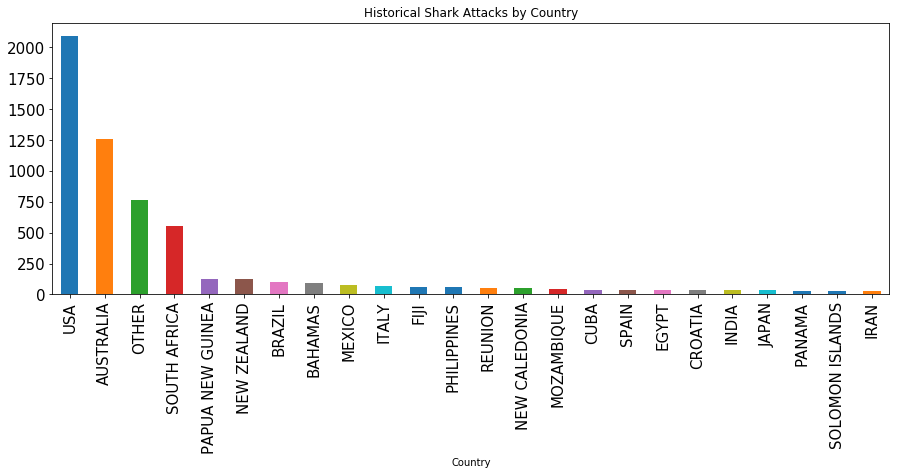

In [66]:
import matplotlib.pyplot as plt
labels = ['USA', 'AUSTRALIA', 'OTHER', 'SOUTH AFRICA']
country_count = df.groupby("Country").Activity.count().sort_values(ascending = False)
display(country_count.plot.bar(figsize=(15,5), fontsize=15))
plt.title('Historical Shark Attacks by Country')
print("\nMost cases are in USA, Australia and South Africa. Other column includes countries with less than 25 incidents.\n")


In [67]:
#Now let's check reasons of attacks in those three relevant countries.

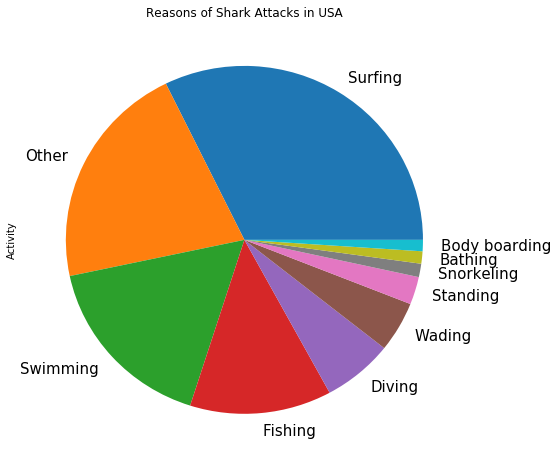

In [68]:
def plot_act_country(country):
    filter_country = df[df["Country"]== country]
    activity_country = filter_country.groupby("Activity").Activity.count().sort_values(ascending = False)
    plt.title('Reasons of Shark Attacks in {}'.format(country))
    activity_country.plot.pie(figsize=(8,8), fontsize=15)

plot_act_country("USA")

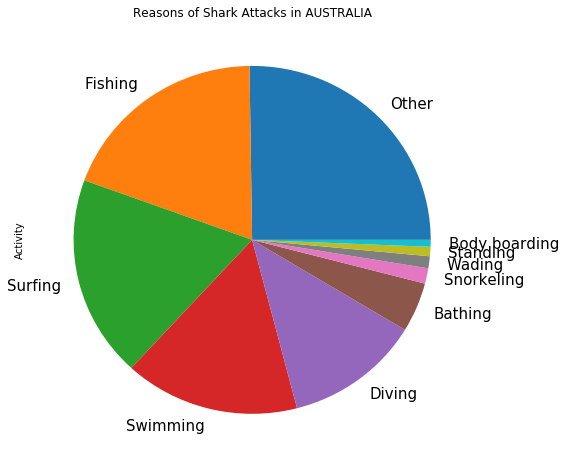

In [69]:
plot_act_country("AUSTRALIA")


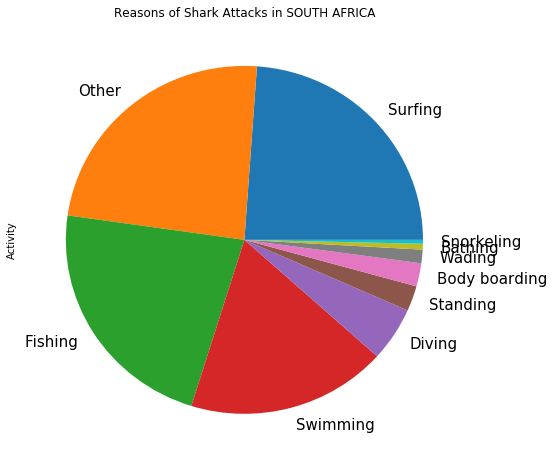

In [70]:
plot_act_country("SOUTH AFRICA")

In [71]:
#Let's see the same chart for all the countries

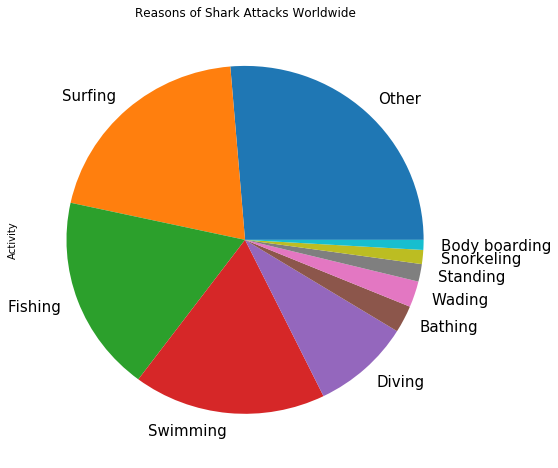

In [72]:
activity_world = df.groupby("Activity").Activity.count().sort_values(ascending = False)
plt.title('Reasons of Shark Attacks Worldwide')
activity_world.plot.pie(figsize=(8,8), fontsize=15)

[2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006]


,Non-fatal,Fatal,Unknown
Year,,,
2016,97.0,1.0,5.0
2015,129.0,0.0,10.0
2014,115.0,0.0,10.0
2013,105.0,1.0,16.0
2012,106.0,0.0,11.0
2011,111.0,0.0,17.0
2010,90.0,0.0,11.0
2009,103.0,0.0,17.0
2008,107.0,1.0,13.0


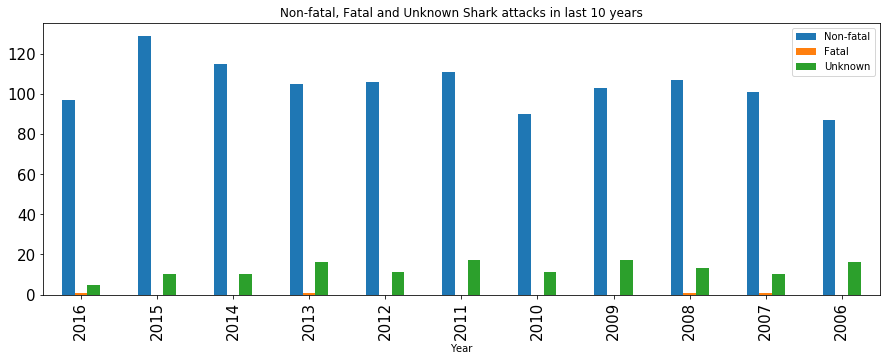

In [73]:
unique_years = list(reversed(range(2006, 2017)))
print(unique_years)
col = df["Fatal (Y/N)"].unique()
count_fatal = []
for i in unique_years:
    count_fatal.append(df[df.Year == i]["Fatal (Y/N)"].value_counts())
    
val = pd.DataFrame(count_fatal)
val = val.fillna(0).values
fatal_year = pd.DataFrame(val, columns= ["Non-fatal", "Fatal", "Unknown"])
fatal_year["Year"] = unique_years
fatal_year.set_index("Year", inplace= True)
fatal_year.plot.bar(figsize=(15,5), fontsize=15)
plt.title('Non-fatal, Fatal and Unknown Shark attacks in last 10 years')
display(fatal_year)